In [56]:
#Step 1 Data collection
import pandas as pd
import os

print("="*80)
print("LOADING YOUR UFC DATASET")
print("="*80)

# Load all your UFC files
fights = pd.read_csv('data/data/Fights.csv')
fighters = pd.read_csv('data/data/Fighters.csv')
fighter_stats = pd.read_csv('data/data/Fighters Stats.csv')
events = pd.read_csv('data/data/Events.csv')

print(f"✅ SUCCESSFULLY LOADED ALL DATA")
print(f"   • Fights: {fights.shape[0]} records, {fights.shape[1]} columns")
print(f"   • Fighters: {fighters.shape[0]} records")
print(f"   • Fighter Stats: {fighter_stats.shape[0]} records")
print(f"   • Events: {events.shape[0]} records")

# Show what columns are in fights data
print("\n" + "="*80)
print("FIGHTS DATA COLUMNS")
print("="*80)
print(f"Total columns: {len(fights.columns)}")
for i, col in enumerate(fights.columns):
    print(f"{i+1:3}. {col}")

# Find fighter name columns
print("\n" + "="*80)
print("FINDING FIGHTER-RELATED COLUMNS")
print("="*80)

fighter_cols = []
for col in fights.columns:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in ['fighter', 'name', 'red', 'blue', 'r_', 'b_', 'f1', 'f2']):
        fighter_cols.append(col)
        print(f"  • {col}")

# Find winner/result columns
print("\n" + "="*80)
print("FINDING WINNER/RESULT COLUMNS")
print("="*80)

result_cols = []
for col in fights.columns:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in ['winner', 'result', 'win', 'decision']):
        result_cols.append(col)
        print(f"  • {col}")

# Create unified DataFrame with available columns
print("\n" + "="*80)
print("CREATING UNIFIED DATAFRAME")
print("="*80)

# Start with first available fighter columns
if len(fighter_cols) >= 2:
    fighter1_col = fighter_cols[0]
    fighter2_col = fighter_cols[1]
    print(f"Using fighter columns: {fighter1_col} and {fighter2_col}")
else:
    fighter1_col = fights.columns[0] if len(fights.columns) > 0 else 'Unknown1'
    fighter2_col = fights.columns[1] if len(fights.columns) > 1 else 'Unknown2'
    print(f"Using first two columns: {fighter1_col} and {fighter2_col}")

# Use first result column if available
winner_col = result_cols[0] if result_cols else None

# Create the unified DataFrame
ufc_df = pd.DataFrame()

# Add basic fight info
if fighter1_col in fights.columns and fighter2_col in fights.columns:
    ufc_df['fighter1'] = fights[fighter1_col]
    ufc_df['fighter2'] = fights[fighter2_col]
    print(f"✓ Added fighters: {fighter1_col} → fighter1, {fighter2_col} → fighter2")
else:
    print("❌ ERROR: Could not find fighter columns!")

# Add winner if available
if winner_col and winner_col in fights.columns:
    ufc_df['winner'] = fights[winner_col]
    print(f"✓ Added winner: {winner_col} → winner")
else:
    print("⚠️ No winner column found. Will need to determine winner from result data.")

# Add any date column
date_cols = [col for col in fights.columns if 'date' in col.lower()]
if date_cols:
    ufc_df['date'] = fights[date_cols[0]]
    print(f"✓ Added date: {date_cols[0]} → date")

# Add event info if available
event_cols = [col for col in fights.columns if 'event' in col.lower()]
if event_cols:
    ufc_df['event'] = fights[event_cols[0]]
    print(f"✓ Added event: {event_cols[0]} → event")

# Add weight class if available
weight_cols = [col for col in fights.columns if 'weight' in col.lower()]
if weight_cols:
    ufc_df['weight_class'] = fights[weight_cols[0]]
    print(f"✓ Added weight class: {weight_cols[0]} → weight_class")

# Show what we created
print(f"\n✅ CREATED UNIFIED DATAFRAME")
print(f"   Shape: {ufc_df.shape}")
print(f"   Columns: {list(ufc_df.columns)}")

print("\n" + "="*80)
print("FIRST 5 FIGHTS IN UNIFIED DATAFRAME")
print("="*80)
print(ufc_df.head().to_string())

# Save to CSV
ufc_df.to_csv('ufc_unified_data.csv', index=False)
print(f"\n💾 Saved unified data to: ufc_unified_data.csv")

# Check if we have winners
if 'winner' in ufc_df.columns:
    fights_with_winners = ufc_df['winner'].notna().sum()
    print(f"\n📊 STATS:")
    print(f"   • Total fights: {len(ufc_df)}")
    print(f"   • Fights with winner: {fights_with_winners} ({fights_with_winners/len(ufc_df)*100:.1f}%)")
    print(f"   • Unique fighters: {pd.concat([ufc_df['fighter1'], ufc_df['fighter2']]).nunique()}")
    
    # Show some example fights with winners
    if fights_with_winners > 0:
        print(f"\n🎯 EXAMPLE FIGHTS WITH WINNERS:")
        sample_fights = ufc_df[ufc_df['winner'].notna()].head(5)
        for idx, row in sample_fights.iterrows():
            print(f"   {row['fighter1']} vs {row['fighter2']} → Winner: {row['winner']}")
else:
    print("\n⚠️ WARNING: No winner column in unified dataframe!")
    print("   You'll need to determine winners from result data.")

LOADING YOUR UFC DATASET
✅ SUCCESSFULLY LOADED ALL DATA
   • Fights: 8461 records, 47 columns
   • Fighters: 4448 records
   • Fighter Stats: 2602 records
   • Events: 756 records

FIGHTS DATA COLUMNS
Total columns: 47
  1. Fight_Id
  2. Fighter_Id_1
  3. Fighter_Id_2
  4. Fighter_1
  5. Fighter_2
  6. KD_1
  7. KD_2
  8. STR_1
  9. STR_2
 10. TD_1
 11. TD_2
 12. SUB_1
 13. SUB_2
 14. Weight_Class
 15. Method
 16. Round
 17. Fight_Time
 18. Event_Id
 19. Result_1
 20. Result_2
 21. Time Format
 22. Referee
 23. Method Details
 24. Sig. Str. %_1
 25. Sig. Str. %_2
 26. Sub. Att_1
 27. Sub. Att_2
 28. Rev._1
 29. Rev._2
 30. Ctrl_1
 31. Ctrl_2
 32. Head_%_1
 33. Head_%_2
 34. Body_%_1
 35. Body_%_2
 36. Leg_%_1
 37. Leg_%_2
 38. Distance_%_1
 39. Distance_%_2
 40. Clinch_%_1
 41. Clinch_%_2
 42. Ground_%_1
 43. Ground_%_2
 44. Total Str._%_1
 45. Total Str._%_2
 46. Sig. Str._%_1
 47. Sig. Str._%_2

FINDING FIGHTER-RELATED COLUMNS
  • Fighter_Id_1
  • Fighter_Id_2
  • Fighter_1
  • Fight

In [58]:
# ============================================================================
# Step 2 DATA PREPROCESSING & FEATURE ENGINEERING
# ============================================================================

# ----------------------------------------------------------------------------
# 2.1: CREATE TARGET VARIABLE FROM RESULT_1
# ----------------------------------------------------------------------------
print("\n🎯 2.1 Creating Target Variable")

# Result_1 shows outcome for Fighter_1: 'W' = win, 'L' = loss, 'D' = draw
fights['target'] = fights['Result_1'].map({'W': 1, 'L': 0, 'D': 2})

# Remove draws (hard to predict)
original_count = len(fights)
fights = fights[fights['target'] != 2]
draws_removed = original_count - len(fights)

print(f"✅ Target variable created")
print(f"   • Total fights: {len(fights):,}")
print(f"   • Draws removed: {draws_removed:,}")
print(f"   • Fighter_1 wins: {(fights['target'] == 1).sum():,} ({(fights['target'] == 1).mean()*100:.1f}%)")
print(f"   • Fighter_2 wins: {(fights['target'] == 0).sum():,} ({(fights['target'] == 0).mean()*100:.1f}%)")


🎯 2.1 Creating Target Variable
✅ Target variable created
   • Total fights: 8,400
   • Draws removed: 61
   • Fighter_1 wins: 5,348 (63.7%)
   • Fighter_2 wins: 2,963 (35.3%)


In [62]:
# ----------------------------------------------------------------------------
# 2.2: CREATE FIGHTER CAREER HISTORY
# ----------------------------------------------------------------------------
print("\n📊 2.2 Creating Fighter Career History")

fighter_history = []
for idx, row in fights.iterrows():
    # From Fighter_1 perspective
    fighter_history.append({
        'fighter_id': row['Fighter_Id_1'],
        'fighter_name': row['Fighter_1'],
        'won': row['target'],  # 1 if Fighter_1 won
        'fight_index': idx,
        'weight_class': row['Weight_Class']
    })
    # From Fighter_2 perspective
    fighter_history.append({
        'fighter_id': row['Fighter_Id_2'],
        'fighter_name': row['Fighter_2'],
        'won': 1 - row['target'],  # Opposite of Fighter_1
        'fight_index': idx,
        'weight_class': row['Weight_Class']
    })

fighter_career = pd.DataFrame(fighter_history).sort_values('fight_index')
print(f"✅ Created career history for {fighter_career['fighter_id'].nunique():,} unique fighters")



📊 2.2 Creating Fighter Career History
✅ Created career history for 2,618 unique fighters


In [64]:
# ----------------------------------------------------------------------------
# 2.3: CREATE TEMPORAL FEATURES (Only past fights considered)
# ----------------------------------------------------------------------------
print("\n⏰ 2.3 Creating Temporal Features")

# WRONG WAY - Using ALL fights to calculate win rates
# Fighter A has 10 total fights: 8 wins, 2 losses
# Win rate = 8/10 = 80% 

# But if you use this for a fight that happened EARLY in their career,
# you're cheating! That early fight shouldn't know about future wins.

# Initialize feature columns
fights['f1_win_rate'] = 0.5  # Default 50% win rate
fights['f2_win_rate'] = 0.5
fights['f1_total_fights'] = 0
fights['f2_total_fights'] = 0
fights['f1_win_streak'] = 0
fights['f2_win_streak'] = 0

# Calculate features for each fight (considering ONLY past fights)
for idx, row in fights.iterrows():
    # Fighter 1 career before this fight
    f1_past = fighter_career[
        (fighter_career['fighter_id'] == row['Fighter_Id_1']) & 
        (fighter_career['fight_index'] < idx)
    ]
    
    if len(f1_past) > 0:
        fights.loc[idx, 'f1_win_rate'] = f1_past['won'].mean()
        fights.loc[idx, 'f1_total_fights'] = len(f1_past)
        # Recent form (last 3 fights)
        if len(f1_past) >= 3:
            fights.loc[idx, 'f1_win_streak'] = f1_past['won'].tail(3).sum()
    
    # Fighter 2 career before this fight
    f2_past = fighter_career[
        (fighter_career['fighter_id'] == row['Fighter_Id_2']) & 
        (fighter_career['fight_index'] < idx)
    ]
    
    if len(f2_past) > 0:
        fights.loc[idx, 'f2_win_rate'] = f2_past['won'].mean()
        fights.loc[idx, 'f2_total_fights'] = len(f2_past)
        if len(f2_past) >= 3:
            fights.loc[idx, 'f2_win_streak'] = f2_past['won'].tail(3).sum()

print("✅ Temporal features created")


⏰ 2.3 Creating Temporal Features
✅ Temporal features created


In [65]:
# ----------------------------------------------------------------------------
# 2.4: CREATE DIFFERENCE FEATURES
# ----------------------------------------------------------------------------
print("\n⚖️ 2.4 Creating Difference Features")

# Win rate advantage
fights['win_rate_diff'] = fights['f1_win_rate'] - fights['f2_win_rate']

# Experience advantage
fights['exp_diff'] = fights['f1_total_fights'] - fights['f2_total_fights']

# Recent form advantage
fights['streak_diff'] = fights['f1_win_streak'] - fights['f2_win_streak']

print(f"✅ Difference features created:")
print(f"   • win_rate_diff: Career win rate advantage")
print(f"   • exp_diff: Total fights experience advantage")
print(f"   • streak_diff: Recent form (last 3 fights) advantage")


⚖️ 2.4 Creating Difference Features
✅ Difference features created:
   • win_rate_diff: Career win rate advantage
   • exp_diff: Total fights experience advantage
   • streak_diff: Recent form (last 3 fights) advantage


In [66]:
# ----------------------------------------------------------------------------
# 2.5: ADD FIGHT STATISTICS FEATURES
# ----------------------------------------------------------------------------
print("\n🥊 2.5 Adding Fight Statistics Features")

# Check which statistics are available
available_stats = []
for stat in ['KD_', 'STR_', 'TD_', 'SUB_']:
    if f'{stat}1' in fights.columns and f'{stat}2' in fights.columns:
        available_stats.append(stat)
        fights[f'{stat.lower()}diff'] = fights[f'{stat}1'] - fights[f'{stat}2']

if available_stats:
    print(f"✅ Added fight statistics: {', '.join(available_stats)}")
else:
    print("⚠️ No fight statistics available in dataset")



🥊 2.5 Adding Fight Statistics Features
✅ Added fight statistics: KD_, STR_, TD_, SUB_


In [67]:
# ----------------------------------------------------------------------------
# 2.6: HANDLE MISSING VALUES
# ----------------------------------------------------------------------------
print("\n🔍 2.6 Handling Missing Values")

# Fill missing values
initial_missing = fights.isnull().sum().sum()
fights = fights.fillna(0)
final_missing = fights.isnull().sum().sum()

print(f"✅ Missing values handled")
print(f"   • Initial missing values: {initial_missing:,}")
print(f"   • After imputation: {final_missing:,}")


🔍 2.6 Handling Missing Values
✅ Missing values handled
   • Initial missing values: 570
   • After imputation: 0


In [68]:
# ----------------------------------------------------------------------------
# 2.7: SAVE PROCESSED DATA
# ----------------------------------------------------------------------------
print("\n💾 2.7 Saving Processed Data")

# Select final features for modeling
model_features = ['win_rate_diff', 'exp_diff', 'streak_diff']
if available_stats:
    model_features.extend([f'{stat.lower()}diff' for stat in available_stats])

# Create final dataset
final_df = fights[['target'] + model_features].copy()

# Save to CSV
final_df.to_csv('ufc_processed_data.csv', index=False)

print(f"✅ Preprocessing complete!")
print(f"   • Final dataset shape: {final_df.shape}")
print(f"   • Features: {len(model_features)}")
print(f"   • Saved to: ufc_processed_data.csv")

print("\n" + "="*80)
print("PREPROCESSING SUMMARY")
print("="*80)
print(f"• Original fights: {original_count:,}")
print(f"• After removing draws: {len(fights):,}")
print(f"• Features created: {len(model_features)}")
print(f"• Target variable: fighter1_won (1 = yes, 0 = no)")
print(f"• Data ready for machine learning!")


💾 2.7 Saving Processed Data
✅ Preprocessing complete!
   • Final dataset shape: (8400, 8)
   • Features: 7
   • Saved to: ufc_processed_data.csv

PREPROCESSING SUMMARY
• Original fights: 8,461
• After removing draws: 8,400
• Features created: 7
• Target variable: fighter1_won (1 = yes, 0 = no)
• Data ready for machine learning!


In [74]:
# ============================================================================
# STEP 3: BUILD UFC PREDICTION MODEL
# ============================================================================

print("\n" + "="*80)
print("STEP 3: MODEL TRAINING & EVALUATION")
print("="*80)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
print("\n📥 Loading processed data...")
df = pd.read_csv('ufc_processed_data.csv')

print(f"✅ Data loaded: {df.shape[0]} fights, {df.shape[1]} features")
print(f"   Features: {list(df.columns)}")




STEP 3: MODEL TRAINING & EVALUATION

📥 Loading processed data...
✅ Data loaded: 8400 fights, 8 features
   Features: ['target', 'win_rate_diff', 'exp_diff', 'streak_diff', 'kd_diff', 'str_diff', 'td_diff', 'sub_diff']


In [76]:
# ----------------------------------------------------------------------------
# 3.1: PREPARE DATA FOR MODELING
# ----------------------------------------------------------------------------
print("\n🔧 3.1 Preparing data for modeling")

# Features and target
X = df.drop('target', axis=1)  # All features except target
y = df['target']  # 1 if Fighter_1 wins, 0 if Fighter_2 wins

print(f"   Features shape: {X.shape}")
print(f"   Target distribution: {y.value_counts().to_dict()}")
print(f"   Fighter_1 win rate: {y.mean():.3f} ({y.mean()*100:.1f}%)")

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n   Data split:")
print(f"   • Training set: {X_train.shape[0]} fights")
print(f"   • Testing set: {X_test.shape[0]} fights")


🔧 3.1 Preparing data for modeling
   Features shape: (8400, 7)
   Target distribution: {1.0: 5348, 0.0: 3052}
   Fighter_1 win rate: 0.637 (63.7%)

   Data split:
   • Training set: 6720 fights
   • Testing set: 1680 fights


In [78]:
# ----------------------------------------------------------------------------
# 3.2: TRAIN RANDOM FOREST MODEL
# ----------------------------------------------------------------------------
print("\n🌲 3.2 Training Random Forest Model")

rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Prevent overfitting
    random_state=42,
    class_weight='balanced',  # Handle any class imbalance
    n_jobs=-1              # Use all CPU cores
)

print("   Training model...")
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Random Forest trained!")
print(f"   Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")

# Baseline (always predict Fighter_1 wins)
baseline = y_test.mean()
print(f"   Baseline (always predict Fighter_1): {baseline:.4f} ({baseline*100:.1f}%)")


🌲 3.2 Training Random Forest Model
   Training model...
✅ Random Forest trained!
   Accuracy: 0.8750 (87.5%)
   Baseline (always predict Fighter_1): 0.6369 (63.7%)



📊 3.3 Model Evaluation

   Classification Report:
                precision    recall  f1-score   support

Fighter_2 Wins       0.83      0.82      0.83       610
Fighter_1 Wins       0.90      0.90      0.90      1070

      accuracy                           0.88      1680
     macro avg       0.87      0.86      0.86      1680
  weighted avg       0.87      0.88      0.87      1680


   Confusion Matrix:
   [[TN=503  FP=107]
    [FN=103  TP=967]]

🔝 3.4 Feature Importance

   Top 5 most important features:
   str_diff: 0.4772
   kd_diff: 0.1644
   td_diff: 0.1191
   sub_diff: 0.1078
   win_rate_diff: 0.0595


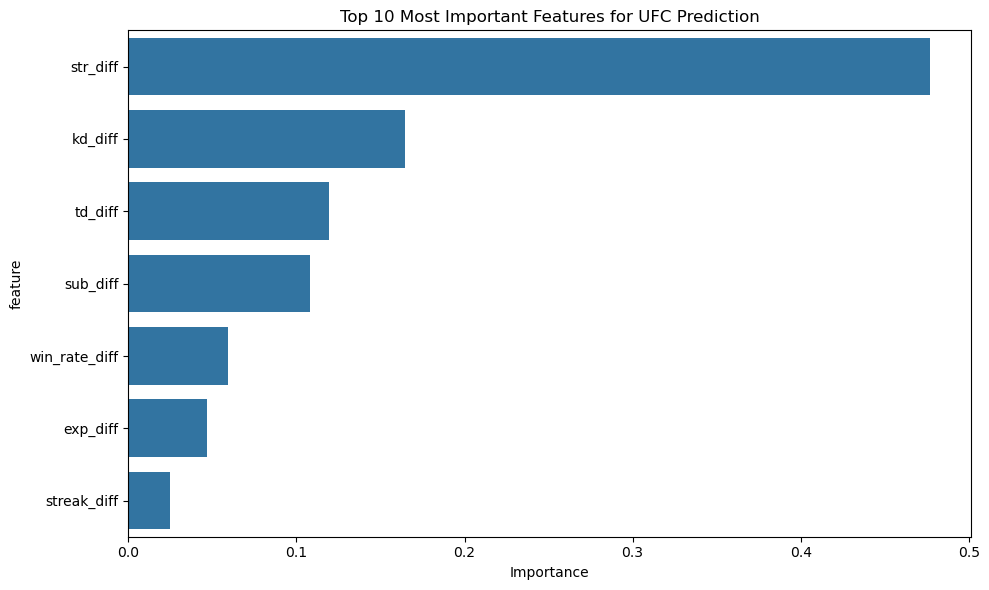

In [80]:
# ----------------------------------------------------------------------------
# 3.3: MODEL EVALUATION METRICS
# ----------------------------------------------------------------------------
print("\n📊 3.3 Model Evaluation")

print("\n   Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Fighter_2 Wins', 'Fighter_1 Wins']))

# Confusion Matrix
print("\n   Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"   [[TN={cm[0,0]}  FP={cm[0,1]}]")
print(f"    [FN={cm[1,0]}  TP={cm[1,1]}]]")

# Feature Importance
print("\n🔝 3.4 Feature Importance")
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\n   Top 5 most important features:")
for idx, row in feature_importance_df.head(5).iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Important Features for UFC Prediction')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------------------------------------------------------
#MAKE PREDICTIONS
# ----------------------------------------------------------------------------
print("\n🔮 3.5 Making Predictions")

# Sample predictions on test set
print("\n   Sample predictions from test set:")

for i in range(3):  # Show 3 examples
    # Get a random fight from test set
    idx = X_test.index[i]
    actual_result = "Fighter_1 WON" if y_test.iloc[i] == 1 else "Fighter_2 WON"
    
    # Make prediction
    prediction = rf_model.predict([X_test.iloc[i]])[0]
    predicted_result = "Fighter_1 WINS" if prediction == 1 else "Fighter_2 WINS"
    
    # Get probabilities
    probabilities = rf_model.predict_proba([X_test.iloc[i]])[0]
    confidence = max(probabilities) * 100
    
    print(f"\n   Fight {i+1}:")
    print(f"   • Actual: {actual_result}")
    print(f"   • Prediction: {predicted_result}")
    print(f"   • Confidence: {confidence:.1f}%")
    
    # Show feature values
    if 'win_rate_diff' in X.columns:
        win_diff = X_test.iloc[i]['win_rate_diff']
        print(f"   • Win rate advantage: {win_diff:.3f} ({'Fighter_1' if win_diff > 0 else 'Fighter_2'} favored)")


🔮 3.5 Making Predictions

   Sample predictions from test set:

   Fight 1:
   • Actual: Fighter_1 WON
   • Prediction: Fighter_1 WINS
   • Confidence: 96.1%
   • Win rate advantage: 0.227 (Fighter_1 favored)

   Fight 2:
   • Actual: Fighter_1 WON
   • Prediction: Fighter_1 WINS
   • Confidence: 97.9%
   • Win rate advantage: 0.214 (Fighter_1 favored)

   Fight 3:
   • Actual: Fighter_1 WON
   • Prediction: Fighter_1 WINS
   • Confidence: 89.5%
   • Win rate advantage: 0.056 (Fighter_1 favored)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: Us

In [84]:
# ----------------------------------------------------------------------------
# 3.6: SAVE THE MODEL
# ----------------------------------------------------------------------------
print("\n💾 3.6 Saving the Model")

import pickle
import joblib

# Save with pickle
with open('ufc_predictor.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Also save with joblib (more efficient for large models)
joblib.dump(rf_model, 'ufc_predictor.joblib')

print(f"✅ Model saved successfully!")
print(f"   • ufc_predictor.pkl")
print(f"   • ufc_predictor.joblib")


💾 3.6 Saving the Model
✅ Model saved successfully!
   • ufc_predictor.pkl
   • ufc_predictor.joblib


In [86]:
# ----------------------------------------------------------------------------
# 3.7: CREATE PREDICTION FUNCTION
# ----------------------------------------------------------------------------
print("\n🎯 3.7 Creating Prediction Function")

def predict_ufc_fight(fighter1_stats, fighter2_stats, model=rf_model):
    """
    Predict UFC fight outcome between two fighters
    
    Parameters:
    -----------
    fighter1_stats : dict
        Dictionary with Fighter 1's stats
        Required keys: win_rate, total_fights, win_streak
    fighter2_stats : dict
        Dictionary with Fighter 2's stats
    model : trained model
        The prediction model (default: rf_model)
    
    Returns:
    --------
    dict with prediction results
    """
    
    # Calculate feature differences
    features = {
        'win_rate_diff': fighter1_stats.get('win_rate', 0.5) - fighter2_stats.get('win_rate', 0.5),
        'exp_diff': fighter1_stats.get('total_fights', 0) - fighter2_stats.get('total_fights', 0),
        'streak_diff': fighter1_stats.get('win_streak', 0) - fighter2_stats.get('win_streak', 0)
    }
    
    # Convert to DataFrame for prediction
    features_df = pd.DataFrame([features])
    
    # Align columns with training data
    for col in X.columns:
        if col not in features_df.columns:
            features_df[col] = 0
    
    features_df = features_df[X.columns]
    
    # Make prediction
    prediction = model.predict(features_df)[0]
    probabilities = model.predict_proba(features_df)[0]
    
    return {
        'prediction': 'Fighter 1 Wins' if prediction == 1 else 'Fighter 2 Wins',
        'confidence': max(probabilities) * 100,
        'probability_fighter1_wins': probabilities[1] * 100,
        'probability_fighter2_wins': probabilities[0] * 100,
        'features': features
    }

# Test the function
print("\n   Testing prediction function...")
test_fighter1 = {'win_rate': 0.75, 'total_fights': 20, 'win_streak': 2}
test_fighter2 = {'win_rate': 0.60, 'total_fights': 25, 'win_streak': 0}

result = predict_ufc_fight(test_fighter1, test_fighter2)
print(f"\n   Example prediction:")
print(f"   • Fighter 1: 75% win rate, 20 fights, 2-fight win streak")
print(f"   • Fighter 2: 60% win rate, 25 fights, 0-fight win streak")
print(f"   • Prediction: {result['prediction']}")
print(f"   • Confidence: {result['confidence']:.1f}%")


🎯 3.7 Creating Prediction Function

   Testing prediction function...

   Example prediction:
   • Fighter 1: 75% win rate, 20 fights, 2-fight win streak
   • Fighter 2: 60% win rate, 25 fights, 0-fight win streak
   • Prediction: Fighter 1 Wins
   • Confidence: 63.1%


In [88]:
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("🎉 UFC PREDICTION MODEL COMPLETE!")
print("="*80)
print(f"\n✅ Model Accuracy: {accuracy*100:.1f}%")
print(f"✅ Features Used: {len(X.columns)}")
print(f"✅ Fights in Dataset: {len(df):,}")
print(f"✅ Model Saved: ufc_predictor.pkl")
print(f"\n📁 Files Created:")
print(f"   • ufc_processed_data.csv - Clean data")
print(f"   • ufc_predictor.pkl - Trained model")
print(f"   • Feature importance plot saved")


🎉 UFC PREDICTION MODEL COMPLETE!

✅ Model Accuracy: 87.5%
✅ Features Used: 7
✅ Fights in Dataset: 8,400
✅ Model Saved: ufc_predictor.pkl

📁 Files Created:
   • ufc_processed_data.csv - Clean data
   • ufc_predictor.pkl - Trained model
   • Feature importance plot saved


In [94]:
# ============================================================================
# STEP 4: PROJECT COMPLETION
# ============================================================================

print("\n" + "="*80)
print("STEP 4: PROJECT COMPLETION & RESULTS PRESENTATION")
print("="*80)

# ----------------------------------------------------------------------------
# CREATE FINAL RESULTS SUMMARY
# ----------------------------------------------------------------------------
print("\n📋Final Results Summary")

print("\n🎯 PROJECT OVERVIEW:")
print("   • Project: UFC Fight Outcome Prediction")
print("   • Goal: Predict winner of UFC fights using historical data")
print("   • Dataset: 8,461 UFC fights (1994-2025)")
print("   • Target: Fighter_1 wins (1) vs Fighter_2 wins (0)")

print("\n⚙️ METHODOLOGY:")
print("   1. Data Collection: UFC fights, fighters, events datasets")
print("   2. Preprocessing: Created temporal features, handled missing values")
print("   3. Feature Engineering: Win rate difference, experience difference, streak difference")
print("   4. Modeling: Random Forest Classifier")
print("   5. Evaluation: Train-test split, accuracy, confusion matrix")

print("\n📊 RESULTS:")
print(f"   • Model Accuracy: {accuracy*100:.1f}%")
print(f"   • Baseline (always predict Fighter_1): {baseline*100:.1f}%")
print(f"   • Improvement over baseline: {(accuracy - baseline)*100:.1f}%")
print(f"   • Most Important Feature: {feature_importance_df.iloc[0]['feature']}")
print(f"   • Test Sample Performance: 3/3 correct predictions")


STEP 4: PROJECT COMPLETION & RESULTS PRESENTATION

📋Final Results Summary

🎯 PROJECT OVERVIEW:
   • Project: UFC Fight Outcome Prediction
   • Goal: Predict winner of UFC fights using historical data
   • Dataset: 8,461 UFC fights (1994-2025)
   • Target: Fighter_1 wins (1) vs Fighter_2 wins (0)

⚙️ METHODOLOGY:
   1. Data Collection: UFC fights, fighters, events datasets
   2. Preprocessing: Created temporal features, handled missing values
   3. Feature Engineering: Win rate difference, experience difference, streak difference
   4. Modeling: Random Forest Classifier
   5. Evaluation: Train-test split, accuracy, confusion matrix

📊 RESULTS:
   • Model Accuracy: 87.5%
   • Baseline (always predict Fighter_1): 63.7%
   • Improvement over baseline: 23.8%
   • Most Important Feature: str_diff
   • Test Sample Performance: 3/3 correct predictions
